In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
# импортирование базы данных
cars = pd.read_csv('/content/car_evaluation.csv')
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
cars.rename(columns = {'vhigh':'price', 'vhigh.1':'maint', '2':'doors', '2.1':'persones', 'small':'lug_capacity', 'low':'safety', 'unacc':'output'}, inplace = True)
# название таблиц слетело, поэтому необходимо восстановить

# Классификация с помощью Tensorflow 2.0

price - цена покупки машины

maint - стоимость обслуживания

doors - количество дверей

persones - количество сидячих мест

lug_capacity - размер багажника

safety - предполагаемая безопасность машины

output - состояние машины


<Axes: ylabel='count'>

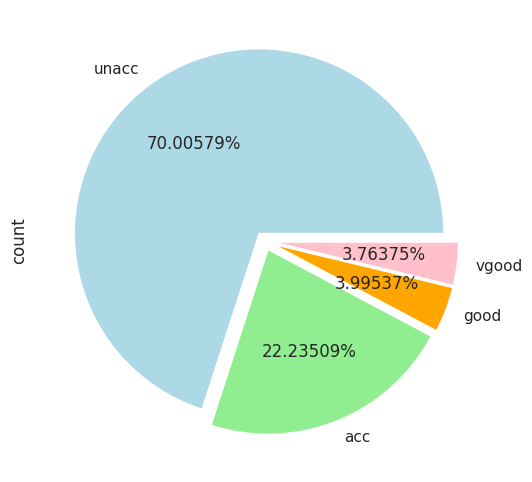

In [ ]:
plot_size = plt.rcParams["figure.figsize"] # строим график, что посмотреть, как распределена целевая переменная
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size

cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))

In [ ]:
# проводим перекодировку в числовые переменные
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persones, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

In [ ]:
X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1) # разделение данных на зависимую переменную
y = labels.values # и независимую

In [ ]:
from sklearn.model_selection import train_test_split # делим выборку на тестову и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model # импортируем необходимые библиотеки для работы с TensorFlow, так как она предполагает работу с искусственными нейронными сетями (ИНС)

In [ ]:
input_layer = Input(shape=(X.shape[1],)) # во входные данные указываем независимые переменные
dense_layer_1 = Dense(15, activation='relu')(input_layer) # первый слой ИНС
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1) # второй слой ИНС
output = Dense(y.shape[1], activation='softmax')(dense_layer_2) # вывод выходных данных

model = Model(inputs=input_layer, outputs=output) # создание модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

print(model.summary()) # вывод результатов обучения модели

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 15)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 4)                   │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 534 (2.09 KB)

 Trainable params: 534 (2.09 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2) # производим обучение модели на 50 эпохах

Epoch 1/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.6751 - loss: 1.0247 - val_acc: 0.6751 - val_loss: 0.8352
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7129 - loss: 0.7407 - val_acc: 0.6751 - val_loss: 0.7231
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.6890 - loss: 0.6384 - val_acc: 0.6895 - val_loss: 0.5986
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7698 - loss: 0.5013 - val_acc: 0.7942 - val_loss: 0.4693
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8493 - loss: 0.3635 - val_acc: 0.8159 - val_loss: 0.4048
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8884 - loss: 0.2991 - val_acc: 0.8267 - val_loss: 0.3639
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8937 - loss: 0.2559 - val_acc: 0.8339 - val_loss: 0.3391
Epoch 8/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9009 - loss: 0.2236 - val_acc: 0.8375 - val_loss: 0.3229
Epoch 9/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - ac

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1) # проверяем точность модели - 97%

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9847 - loss: 0.0616 
Test Score: 0.0713968425989151
Test Accuracy: 0.9768785834312439


# Регрессия с помощью TensorFlow 2.0

In [ ]:
petrol_cons = pd.read_csv('/content/petrol_consumption.csv') # импортируем датасет
petrol_cons.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Petrol_tax - налог на бензин

Average_income - средний доход

Paved_Highways - асфальтированные магистрали

Population_Driver_licence(%) - количество водителей, пользующихся лицензией(%)

Petrol_Consumption - потребление бензина

In [ ]:
X = petrol_cons.iloc[:, 0:4].values
y = petrol_cons.iloc[:, 4].values
# указываем целевую переменную и независимые переменные
from sklearn.model_selection import train_test_split
# разделили на соответствующие выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
# унифицируем данные
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)
# создаём модель регрессии с ИНС, но уже с большим кол-ом сетей
model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [ ]:
print(model.summary())

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 100)                 │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,851 (26.76 KB)

 Trainable params: 6,851 (26.76 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2) # производим обучение модели на 50 эпохах

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 385390.3750 - mean_squared_error: 385390.3750 - val_loss: 402640.5000 - val_mean_squared_error: 402640.5000
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 327434.8438 - mean_squared_error: 327434.8438 - val_loss: 402353.8438 - val_mean_squared_error: 402353.8438
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 311332.0625 - mean_squared_error: 311332.0625 - val_loss: 401830.0625 - val_mean_squared_error: 401830.0625
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 333921.8750 - mean_squared_error: 333921.8750 - val_loss: 400650.3125 - val_mean_squared_error: 400650.3125
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 332412.4688 - mean_squared_error: 332412.4688 - val_loss: 398018.4062 - val_mean_squared_error: 398018.4062
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 324635.0312 - mean_squared_error: 324635.0312 - val_loss: 392425.6250 - val_mean_squared_error: 392425.62

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# оцениваем модель как для тренировочной выборки, так и для тестовой
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
57.36126895988492
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
86.91346874042871


Модель переобучилась